In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import interpolate
import seaborn as sns
from scipy.sparse.linalg import eigs
%matplotlib inline

# Task1a
**dx/dt** vs **x** plots.

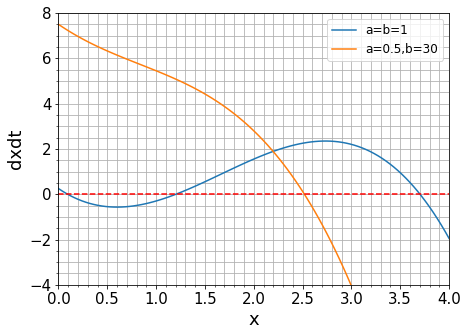

In [2]:
dXdt1 = []
dXdt2 = []
x = np.linspace(0,4,100)
for i in range(len(x)):
    k = np.array([3,0.6,0.25,2.95])
    dXdt1.append((k[0]*1*x[i]*x[i])-(k[1]*x[i]*x[i]*x[i])+(k[2]*1)-(k[3]*x[i]))
    dXdt2.append((k[0]*0.5*x[i]*x[i])-(k[1]*x[i]*x[i]*x[i])+(k[2]*30)-(k[3]*x[i]))
dXdt1 = np.array(dXdt1)
dXdt2 = np.array(dXdt2)
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x,dXdt1,label='a=b=1')
ax.plot(x,dXdt2,label='a=0.5,b=30')
ax.axhline(y=0, color='r', linestyle='--')
plt.ylim(-4,8)
plt.xlim(0,4)
ax.grid(which='both')
ax.minorticks_on()
ax.legend(loc='best',fontsize=12)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('dxdt', fontsize=18)
ax.tick_params(labelsize=15)
#ax.set_title('Steady State Behaviour', fontsize=20)

# Task1c

**Stochastic simulation algorithm**

In [3]:
def gillespie_model(x0,tf):
    A = 1
    B = 2
    k = np.array([3,0.6,0.25,2.95])
    c = np.array([k[0]*0.05,k[1]*0.0025,k[2]*20,k[3]])    
    
    Nr = np.array([1,-1,1,-1])
    X = []
    tvec = []
    x = x0
    X.append(x)
    t = 0
    tvec.append(t)
    
    while t<tf:
        alpha = np.array([c[0]*A*x*(x-1), c[1]*x*(x-1)*(x-2), c[2]*B, c[3]*x])
        alpha[np.where(alpha<=0)] = 0
        W = sum(alpha)
        #print(x)
        tau = (-1/W)* np.log(np.random.uniform(0,1)) # when does the next reaction take place
        r = np.where(np.cumsum(alpha) >= W*np.random.uniform(0,1))[0].min() #  which reaction does take place
        x = x + Nr[r] # update state vector
        t = t + tau # update time
        if (t<tf):
            tvec.append(t)
            X.append(x)
    return (X,tvec)

In [4]:
X,tvec = gillespie_model(0,10**3)

Text(0.5,0,'X')

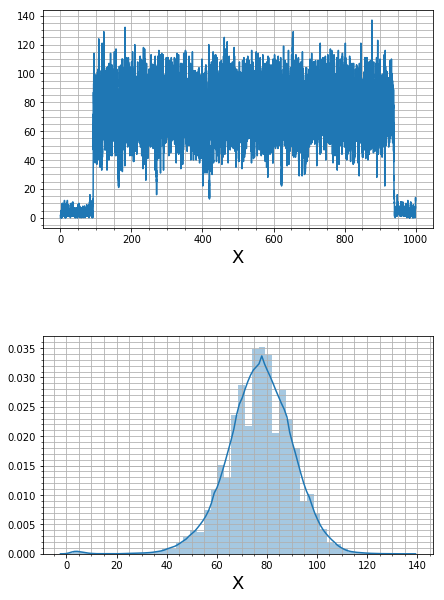

In [5]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7, 10))
#fig.tight_layout()
sns.lineplot(tvec,X,ax=ax1,ci=None)
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_xlabel('X',fontsize=18)
sns.distplot(X,ax=ax2)
fig.subplots_adjust(hspace = .5)
#ax2.hist(X,normed=False)
ax2.grid(which='both')
ax2.minorticks_on()
ax2.set_xlabel('X',fontsize=18)
#ax.set_xlabel('x', fontsize=18)
#ax.set_ylabel('dxdt', fontsize=18)

# Task1d

**Chemical Master Equation**

In [6]:
def CME(naV,N):
    A = 1
    B = 2
    k = np.array([3,0.6,0.25,2.95])
    c = np.array([k[0]/naV,k[1]/naV**2,k[2]*naV,k[3]])
    
    lamda = []
    mu = []
    for i in range(N+1):
        lamda.append((A*c[0]*i*(i-1))+ B*c[2])
        mu.append((c[3]*i)+(c[1]*i*(i-1)*(i-2)))
    lamda = np.array(lamda)
    mu = np.array(mu)
    M = np.diag(lamda[0:-1],-1) + np.diag(mu[1:],1) + np.diag((lamda+mu)*-1)
    return (M)

In [7]:
M20 = CME(20,160)
M40 = CME(40,300)

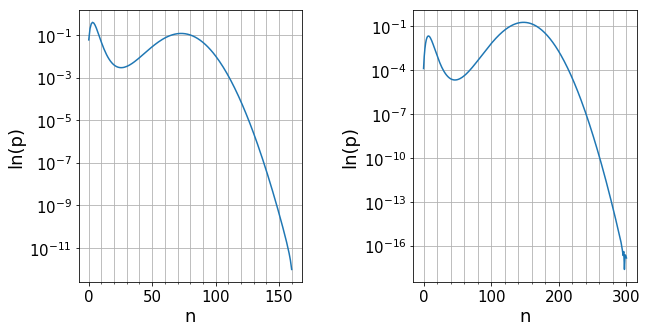

In [8]:
_,v20 = eigs(M20, k=1, sigma=1e-6)
_,v40 = eigs(M40, k=1, sigma=1e-6)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.semilogy(np.arange(0,161),np.abs(v20))
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_xlabel('n', fontsize=18)
ax1.set_ylabel('ln(p)', fontsize=18)
ax1.tick_params(labelsize=15)


fig.subplots_adjust(wspace = .5)

ax2.semilogy(np.arange(0,301),np.abs(v40))
ax2.grid(which='both')
ax2.minorticks_on()
#ax2.set_xlabel('X',fontsize=18)
ax2.set_xlabel('n', fontsize=18)
ax2.set_ylabel('ln(p)', fontsize=18)
ax2.tick_params(labelsize=15)